In [1]:
set.seed(1234)

# Section D. Ridge Regression
## Question 5 [Ridge Regression]
### I 
Algorithm solution in PDF file

In [2]:
train = read.csv("assignment1_datasets/Task1C_train.csv")
test = read.csv("assignment1_datasets/Task1C_test.csv")

train_features = as.matrix(train[,-ncol(train)])
train_target = as.matrix(train[,ncol(train)])
test_features = as.matrix(test[,-ncol(test)])
test_target = as.matrix(test[,ncol(test)])


### II 

Implementing SGD and BGD that takes in the training data, the value of lambda, the learning rate, epsilon and the maximum number of updates to return the optimal value of theta and the cost.

In [3]:
bgd <- function(x,y,lambda,eta,epsilon,max_epoch = 20){
    m = dim(x)[1]
    n = dim(x)[2]
    x = scale(x)
    y = scale(y)
    
    # n+1 to inculde theta 0
    theta = as.matrix(runif(n+1))
    x = as.matrix(cbind(1,x))
    y = as.matrix(y)
    cnt = 1
    
    # theta_rec and cost_rec keep the record of the updates made
    theta_rec = matrix(nrow = max_epoch,ncol = n+1 )
    cost_rec = matrix(nrow = max_epoch)
    
    # the while loop checks for the stopping condition, that is if maximum uodates have been made
    while (cnt <= max_epoch){
        
        hypothesis = x %*% theta
    
        # cost mean sum of squares plus the penalty term
        cost = ((sum((hypothesis - y)^2)/m )+ (lambda * sum(theta^2)))/2
        
        # checks for the terminating condition is cost is less than epsilon
        if ( cost < epsilon ){
            break
        }
        # decrese the learning rate if cost is increasing
        if (cnt != 1){
            if(cost > cost_rec[cnt - 1]){
                print("Learning rate too high")
                eta =eta/2
            }
                
        }

        # calculate the gradient and the update the value of theta
        grad = (t(t(hypothesis - y) %*% x)/m )+ (lambda * theta)
        theta = theta - (eta*grad)
        
        # preserve the records
        cost_rec[cnt] = cost
        theta_rec[cnt,] = t(theta)
        cnt = cnt + 1 
        

        
    }
    
    return(list('cost'=cost_rec,'theta'=theta_rec)) 
}


In [4]:
sgd <- function (x,y,lambda,eta,epsilon,max_epoch = 20) {
    m = dim(x)[1]
    n = dim(x)[2]
    flag = 0
    x = scale(x)
    y = scale(y)
    x = cbind(1,x)
    cnt = 1
    max_count = max_epoch * m
    theta = as.matrix(runif(n+1))
    cost_rec = matrix(Inf)
    theta_rec = as.matrix(t(theta))
    
    # check for terminating condition , flag is for erre less than epsilon
    while((cnt < max_count) & (flag == 0)){
        
        # shuffle the sample once a complete data set has been used
        x_index = sample(1:m, m, replace = FALSE)
        
        for (i in x_index){
            # hypothesis and calculate the cost for one point
            prediction = x[i,] %*% theta
            cost = ((prediction - y[i])^2)/2 + (lambda * sum(theta^2))/2
            
            #calculate gradient and then update the theta value
            grad = t((prediction - y[i]) %*% x[i,]) + (lambda * theta)
            theta = theta - (eta*grad)
            cnt = cnt+1
            
            #preserve the records
            cost_rec = rbind(cost_rec,cost)
            theta_rec = rbind(theta_rec,t(theta))
            if(cnt > max_count){
                break
            }
            
            if ( cost < epsilon ){
                flag = 1
                break
            }
        }
        
        
    }
    
    return(list('cost'=as.matrix(cost_rec[-1]),'theta'=as.matrix(theta_rec[-1])))
    
    
}


### III
Evaluating the error for Stochastic Gradient Descent and Batch Gradient Descent

In [5]:
cost_theta_bgd = bgd(x = train_features , y = train_target , lambda = 30 , eta =  0.005 , epsilon = 0.00001 , max_epoch = 40 )
cost_theta_sgd = sgd(x = train_features , y = train_target , lambda = 30 , eta =  0.005 , epsilon = 0.00001 , max_epoch = 40 )

The cell below manipulates the object for SDG and BGD to combine them into one data frame.

In [6]:
bgd_error = data.frame("No Data Points"= seq(930,nrow(train)*40,nrow(train)) ,"Error"= cost_theta_bgd$cost,"Type" ="Batch" )
sgd_error = data.frame("No Data Points"= 1:nrow(cost_theta_sgd$cost),"Error"=cost_theta_sgd$cost,"Type" = "Stochastic")
errors = rbind(bgd_error,sgd_error)

Now we produce a plot of the errors vs the number of data points used by each algorithm. To save the plot to the directory uncomment the two functions.

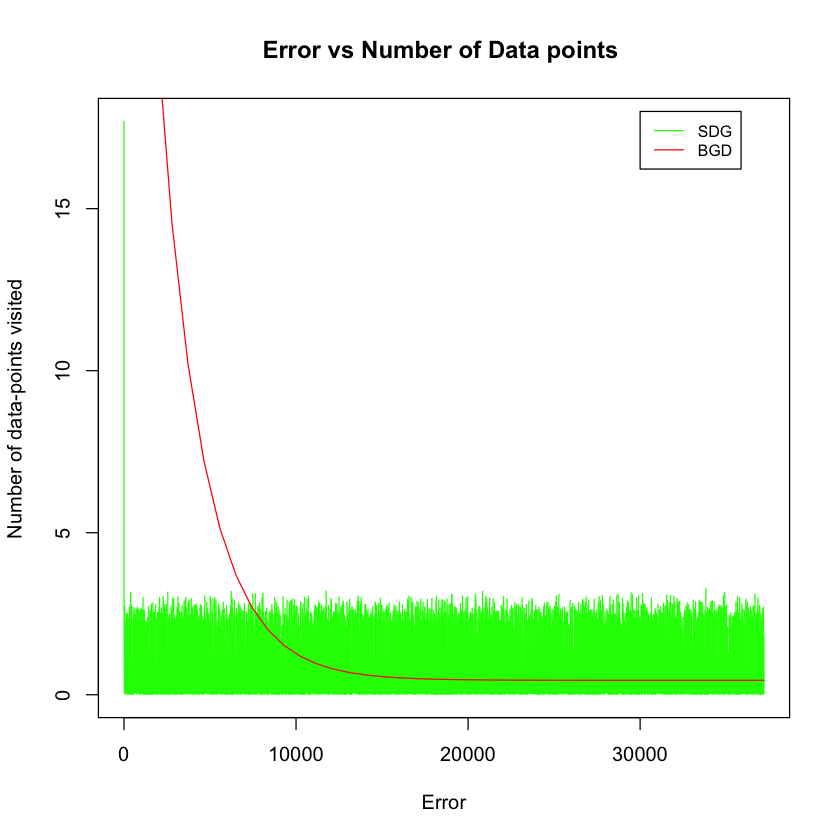

In [7]:
# jpeg('error.jpg-vs-datapoints',width = 1200, height = 350)
plot(sgd_error$No.Data.Points,sgd_error$Error,type = "l",col = "green",main = "Error vs Number of Data points ", xlab = "Error", ylab = "Number of data-points visited")
lines(bgd_error$No.Data.Points,bgd_error$Error,col = "red")
legend(30000,18, legend=c("SDG", "BGD"),
       col=c("green", "red"), lty=1:1, cex=0.8)
# dev.off()

From the plot above we can conclude 3 things about the behaviour of SDG and BGD in general :
- The Sgd algorithm converges to the suboptimal value way quickly than BGD. From the graph we can see that after going through almost 9000 points the BGD algorithm starts performing better than SGD and attains the optimal value near 12,000 data points while on the other hand, SGD algorithm converges to suboptimal value within first 100 data points and then varies from the optimal value not by much. 

- The SGD algorithm can perform better than BGD algorithm incase there are millions of records, since it would take n * million datapoints to reach an optimal value while SGD can reach a sib optimal value by learning through say a thousand data points.

- On the contrary, if the dataset us not very large, BGD would definately outperform SGD.